## Insurer Level Stats Visualization

This notebook focuses on visualizing insurer level statistics across all Krankenkasse's provided in our dataset. This is a part of Exploratory Data Analysis done to understand the rate of members, additional contribution and risk factor of all insurances from 2016 to 2025. This uses the Final_Insurer_Level_Dataset file created during preprocessing.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import warnings
import matplotlib.ticker as mticker

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

df = pd.read_excel("Final_Insurer_Level_Dataset.xlsx")

df["Jahr"] = pd.to_numeric(df["Jahr"], errors='coerce')


In [ ]:
def plot_insurer_trends(selected_insurer):
    insurer_df = df[df["Krankenkasse"] == selected_insurer].sort_values("Jahr")

    if insurer_df.empty:
        print(f"No data for {selected_insurer}")
        return

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"Trends for {selected_insurer} (2016–2025)", fontsize=16)

    formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}')

    sns.lineplot(data=insurer_df, x="Jahr", y="Mitglieder", ax=axes[0, 0], marker="o")
    axes[0, 0].set_title("Mitglieder")
    axes[0, 0].yaxis.set_major_formatter(formatter)

    sns.lineplot(data=insurer_df, x="Jahr", y="Versicherte", ax=axes[0, 1], marker="o")
    axes[0, 1].set_title("Versicherte")
    axes[0, 1].yaxis.set_major_formatter(formatter)

    sns.lineplot(data=insurer_df, x="Jahr", y="Zusatzbeitrag", ax=axes[1, 0], marker="o", color="darkorange")
    axes[1, 0].set_title("Zusatzbeitrag")

    sns.lineplot(data=insurer_df, x="Jahr", y="Risikofaktor", ax=axes[1, 1], marker="o", color="crimson")
    axes[1, 1].set_title("Risikofaktor")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

We create an interactive dropdown where we can select any Krankenkasse across our dataset and have dynamic graphs generated to visualize number of members, change in additional contribution and change in risk factor across the years.

In [ ]:
dropdown = widgets.Dropdown(
    options=sorted(df["Krankenkasse"].dropna().unique()),
    description='Krankenkasse:',
    layout=widgets.Layout(width='60%')
)

widgets.interact(plot_insurer_trends, selected_insurer=dropdown)

interactive(children=(Dropdown(description='Krankenkasse:', layout=Layout(width='60%'), options=('AOK Baden-Wü…

<function __main__.plot_insurer_trends(selected_insurer)>

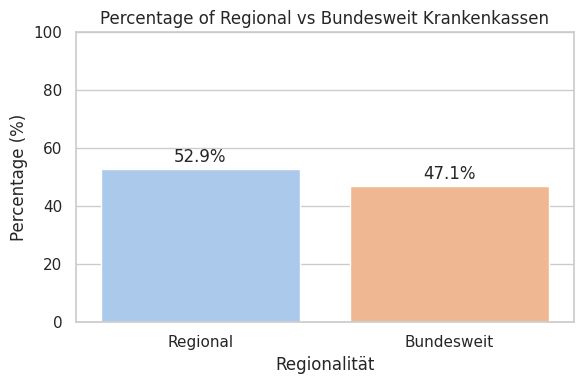

In [ ]:
# Count each type
regional_counts = df[["Krankenkasse", "Regionalität"]].drop_duplicates()
regional_summary = regional_counts["Regionalität"].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=regional_summary.index, y=regional_summary.values, palette="pastel")

plt.title("Percentage of Regional vs Bundesweit Krankenkassen")
plt.ylabel("Percentage (%)")
plt.xlabel("Regionalität")
plt.ylim(0, 100)
for i, val in enumerate(regional_summary.values):
    plt.text(i, val + 1, f"{val:.1f}%", ha="center", va="bottom")
plt.tight_layout()
plt.show()